# Selección de Características: Categórico


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression

## Pima Indians Diabetes

El Pima Indians Diabetes [Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Riñones (*National Institute of Diabetes and Digestive and Kidney Diseases*). El objetivo de este dataset consiste en el diagnóstico predictivo de si un paciente tiene o no tiene diabetes, esto con base en mediciones diagnósticas. 

In [ ]:
diabetes_columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

diabetes = pd.read_csv("data/pima-indians-diabetes.data.csv", names = diabetes_columns)
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Se dividen las variables de entrada y la de salida

In [ ]:
data = diabetes.values[:,:-1]
target = diabetes.values[:,-1]

Y luego entre datos de entrenamiento y de prueba

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=.2, random_state=0)

In [ ]:
print("Train:", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)

Train: (614, 8) (614,)
Test:  (154, 8) (154,)


### KBest con ANOVA F-test
ANOVA (acrónimo de Análisis de Varianza en inglés) es una prueba de hipótesis estadística paramétrica para determinar si el promedio entre dos muestras de datos provienen de la misma distribución. F-test es una clase de prueba estadística que calcula la proporción entre valores de varianza, como la varianza de dos muestra distintas como en ANOVA. Lo más importante es que el ANOVA F-test es utilizado cuando una de las variables es numérica y la otra categórica como es el caso de un dataset con variables de entrada numéricas y la variable a predecir es categórica.

`f_classif()` es una implementación de ANOVA F-test en `scikit-learn` que puede ser utilizado por `SelectKBest` para seleccionar las $k$ características más relevantes, es decir, las características con calificación más alta del ANOVA F-test.

Utiliza la función `SelectKBest` para filtrar las 6 variables más importantes de acuerdo al ANOVA F-test. Imprime la calificación de cada variable.

In [ ]:
feature_selector = SelectKBest(score_func=f_classif, k=6)
feature_selector.fit(data_train, target_train)

SelectKBest(k=6)

Con la función de `transform()` seleccionamos de nuestro conjunto original de características aquellas $k$ primeras que fueron seleccionadas de acuerdo a lo definido en el selector.

Asigna la selección a la variable `data_train_fs` y `data_test_fs`.

In [ ]:
data_train_fs = feature_selector.transform(data_train)
data_test_fs = feature_selector.transform(data_test)

In [ ]:
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)
print("Train Transformado:", data_train_fs.shape)
print("Test Transformado: ", data_test_fs.shape)

Train Original:     (614, 8)
Test Original:      (154, 8)
Train Transformado: (614, 6)
Test Transformado:  (154, 6)


Independiente de la cantidad de características seleccionadas, los resultados de la función de calificación pueden ser visualizados.

In [ ]:
feature_selector.scores_

array([ 23.93170881, 163.60276314,   2.04165766,   4.80349091,
         8.92435119,  62.25019839,  16.77446702,  37.07130598])

In [ ]:
# Iterando por sobre todas las características e imprimiendo la calificación correspondiente
print("Calificación de obtenida de cada característica (mayor es mejor)")
print("================================================================")
for i in range(len(feature_selector.scores_)):
    print("Característica {:d}: {:10f}".format(i, feature_selector.scores_[i]))

Calificación de obtenida de cada característica (mayor es mejor)
Característica 0:  23.931709
Característica 1: 163.602763
Característica 2:   2.041658
Característica 3:   4.803491
Característica 4:   8.924351
Característica 5:  62.250198
Característica 6:  16.774467
Característica 7:  37.071306


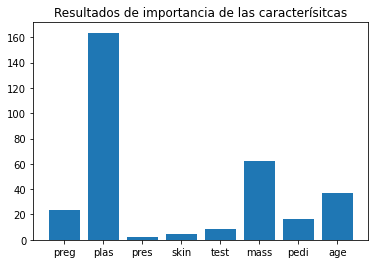

In [ ]:
# Gráfica de barras con el nombre de las características y la calificación obtenida
plt.bar([diabetes.columns[i] for i in range(len(feature_selector.scores_))], feature_selector.scores_)
plt.title("Resultados de importancia de las caracterísitcas")
plt.show()

### RFE
La Eliminación Recursiva de Características (RFE por sus siglas en inglés) es un algoritmo de búsqueda de características que utiliza un modelo de predicción para realizar un ajuste, establece el órden de importancia de las variables y elimina la menos relevante. Posteriormente, vuelve a clasificar el modelo con las características restantes y repite el proceso iterativamente hasta que queden el número deseado de variables de entradas.

Para este ejemplo, se utiliza un modelo de regresión logística que acepta valores numéricos de entrada y produce un valor de clasificación binario. Otra opción popular son árboles de decisión.

Utiliza la función `RFE` para realizar la eliminación recursiva con regresión logística para 6 variables finales. Imprime la calificación de cada variable (ranking).

In [ ]:
rfe = RFE(estimator=LogisticRegression(solver="liblinear"), n_features_to_select=6)
rfe.fit(data_train, target_train)

RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=6)

In [ ]:
data_train_rfe = rfe.transform(data_train)
data_test_rfe = rfe.transform(data_test)

In [ ]:
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)
print("Train Transformado:", data_train_rfe.shape)
print("Test Transformado: ", data_test_rfe.shape)

Train Original:     (614, 8)
Test Original:      (154, 8)
Train Transformado: (614, 6)
Test Transformado:  (154, 6)


In [ ]:
# Iterando por sobre todas las características e imprimiendo la clasificación correspondiente
print("Clasificación de cada característica (menor es mejor)")
print("====================================================")
for i in range(len(rfe.ranking_)):
    print("Característica {:d}: {:d}".format(i, rfe.ranking_[i]))

Clasificación de cada característica (menor es mejor)
Característica 0: 1
Característica 1: 1
Característica 2: 1
Característica 3: 2
Característica 4: 3
Característica 5: 1
Característica 6: 1
Característica 7: 1


> Código basado en el libro _**Data Preparation for Machine Learning:** Data Cleaning, Feature Selection, and Data Transforms in Python_ por Jason Brownlee.